<a href="https://colab.research.google.com/github/PauloLucena2022/Atividade-01---LLM-e-Estat-stica/blob/main/Atividade%203.1/Atividade_3.1_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 3.1 - Parte 1 (Multiplicação de Matrizes / Redes Neurais)

In [ ]:
import torch
import torch.nn.functional
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import math

## A1


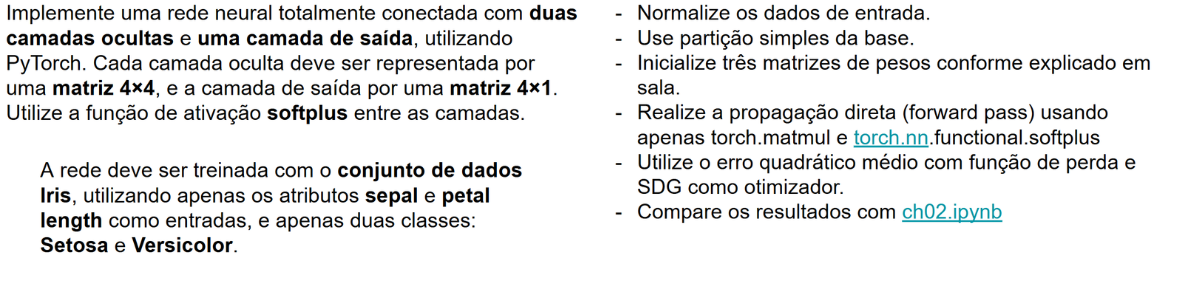

In [ ]:
iris = load_iris()

df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
features = iris.data[:, [0,2]]
y_iris = iris.target

In [ ]:
filtro = y_iris < 2
features = features[filtro]
y_iris = y_iris[filtro]

In [ ]:
# Divisão treino/teste e Normalização

X_treino, X_teste, y_treino, y_teste = train_test_split(features, y_iris, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

X_treino = torch.tensor(X_treino, dtype = torch.float32)
X_teste = torch.tensor(X_teste, dtype = torch.float32)
y_treino = torch.tensor(y_treino, dtype = torch.float32).view(-1,1)
y_teste = torch.tensor(y_teste, dtype = torch.float32).view(-1,1)

In [ ]:
w1 = torch.randn(4, 4, requires_grad = True)
w2 = torch.randn(4, 4, requires_grad = True)
w3 = torch.randn(4, 1, requires_grad = True)

In [ ]:
def expansao_entrada(input):
  zeros = torch.zeros((input.shape[0], 2))
  return torch.cat((input, zeros), dim = 1)

X_treino = expansao_entrada(X_treino)
X_teste = expansao_entrada(X_teste)

In [ ]:
def forward(input):
  pre_ativacao1 = torch.matmul(input, w1)
  ativacao1 = torch.nn.functional.softplus(pre_ativacao1)

  pre_ativacao2 = torch.matmul(ativacao1, w2)
  ativacao2 = torch.nn.functional.softplus(pre_ativacao2)

  pre_ativacao3 = torch.matmul(ativacao2, w3)
  return pre_ativacao3

In [ ]:
# Função de perda e otimização
perda = torch.nn.MSELoss()
otimizador = torch.optim.SGD([w1, w2, w3], lr = 0.01)

In [ ]:
epocas = 1000

for epoc in range(epocas):
  otimizador.zero_grad()

  y_pred = forward(X_treino)
  loss = perda(y_pred, y_treino)

  loss.backward()
  otimizador.step()

  if epoc % 50 == 0:
    print(f'Época {epoc} | Loss: {loss.item():.4f}')

Época 0 | Loss: 7.0350
Época 50 | Loss: 0.0807
Época 100 | Loss: 0.0458
Época 150 | Loss: 0.0298
Época 200 | Loss: 0.0222
Época 250 | Loss: 0.0185
Época 300 | Loss: 0.0167
Época 350 | Loss: 0.0157
Época 400 | Loss: 0.0151
Época 450 | Loss: 0.0147
Época 500 | Loss: 0.0145
Época 550 | Loss: 0.0143
Época 600 | Loss: 0.0141
Época 650 | Loss: 0.0139
Época 700 | Loss: 0.0138
Época 750 | Loss: 0.0137
Época 800 | Loss: 0.0135
Época 850 | Loss: 0.0134
Época 900 | Loss: 0.0133
Época 950 | Loss: 0.0133


In [ ]:
# Avaliação de teste

with torch.no_grad():
  y_teste_pred = forward(X_teste)
  loss_teste = perda(y_teste_pred, y_teste)

  y_teste_classe = (y_teste_pred > 0.5).float()

  acuracia = (y_teste_classe == y_teste).float().mean()

  print(f"Loss: {loss_teste.item():.4f}")
  print(f'Acurácia: {acuracia.item() * 100:.2f}')

Loss: 0.0193
Acurácia: 100.00


### Interpretação A1

Ao analisar os resultados obtidos é possível perceber que durante as 1000 épocas de treinamento, observou-se uma redução da função de perda. A perda inicial elevada (7.0350) mostra pesos inicias aleatórios e pouco ajustados, enquanto a diminuição progressiva do erro mostra que a rede conseguiu aprender uma boa representação para separar as duas classes. Ou seja, o modelo está minimizando a distância quadrática média entre as saídas previstas e os labels reais, convergindo para uma solução estável.

Nos testes, a rede apresentou um loss de 0.0193 e uma acurácia de 100% (utilizando um limiar de 0,5 para a conversão das saídas contínuas em classes).Esse resultado sugere que as classes Setosa e Versicolor são linearmente (ou quase linearmente) separáveis quando consideradas as features utilizadas, e que a rede neural conseguiu capturar essa separação de forma eficiente. Outra informação importante é que o conjunto Iris é relativamente simples, o que explica o desempenho elevado.

- Comparação com ch02.ipynb

Primeiramente, o modelo que está no ch02 é um perceptron clássico, sendo um modelo linear, com uma única camada e usa função de ativação step, aprendendo situações linearmente separáveis. Enquanto a implementada nessa atividade A1 é uma rede neural multicamada (com duas camadas ocultas) e função softplus, capaz de modelar relações não linearmente separáveis.

Em relação aos resultados, observa-se que os modelos alcançaram desempenho excelente na tarefa de classificação entre as classes Setosa e Versicolor.

O Perceptron apresentou convergência rápida, evidenciada pela redução no número de atualizações por época até zero, indicando que os dados são linearmente separáveis no espaço das features utilizadas. Evidenciado também pela fronteira de decisão linear.

Por outro lado, a rede neural multicamada apresentou uma redução contínua e suave da função de perda ao longo das épocas, atingindo um valor final baixo de erro quadrático médio e acurácia de 100% no conjunto de teste. Diferentemente do Perceptron, a rede neural possui maior capacidade representacional devido às camadas ocultas e à função de ativação Softplus, permitindo modelar relações não lineares.


## B1

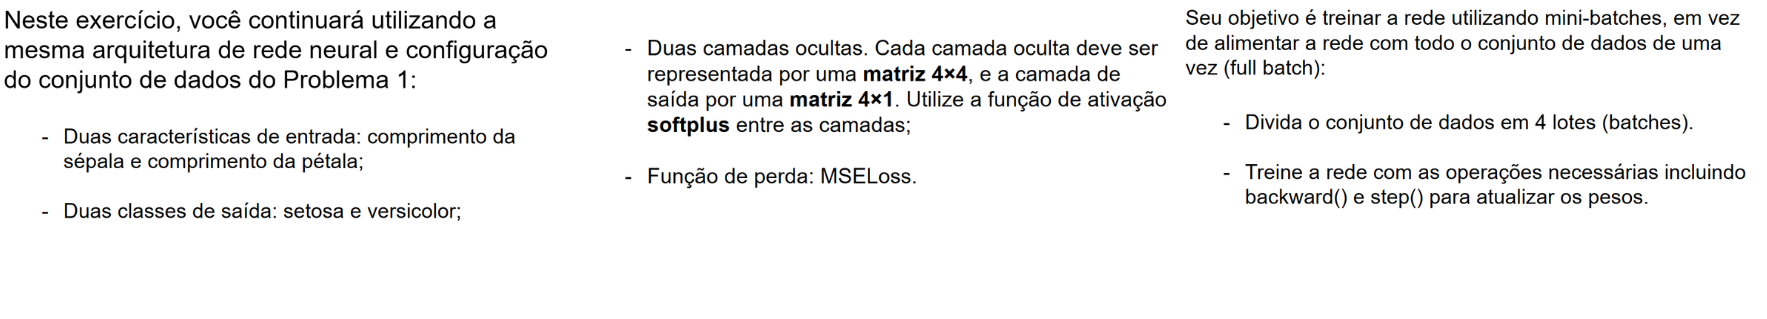

In [ ]:
batch_size = len(X_treino) // 4

In [ ]:
epocas = 2000

for epoc in range(epocas):

  permutacao = torch.randperm(len(X_treino))
  X_embaralhado = X_treino[permutacao]
  y_embaralhado = y_treino[permutacao]

  for i in range(0, len(X_treino), batch_size):
    X_batch = X_embaralhado[i:i+batch_size]
    y_batch = y_embaralhado[i:i+batch_size]

    otimizador.zero_grad()

    y_pred = forward(X_batch)
    loss = perda(y_pred, y_batch)

    loss.backward()
    otimizador.step()

  if epoc % 50 == 0:
    print(f'Época {epoc} | Loss: {loss.item():.4f}')

Época 0 | Loss: 0.0101
Época 50 | Loss: 0.0025
Época 100 | Loss: 0.0251
Época 150 | Loss: 0.0014
Época 200 | Loss: 0.0059
Época 250 | Loss: 0.0080
Época 300 | Loss: 0.0057
Época 350 | Loss: 0.0052
Época 400 | Loss: 0.0139
Época 450 | Loss: 0.0089
Época 500 | Loss: 0.0106
Época 550 | Loss: 0.0025
Época 600 | Loss: 0.0328
Época 650 | Loss: 0.0061
Época 700 | Loss: 0.0058
Época 750 | Loss: 0.0047
Época 800 | Loss: 0.0033
Época 850 | Loss: 0.0039
Época 900 | Loss: 0.0001
Época 950 | Loss: 0.0029
Época 1000 | Loss: 0.0033
Época 1050 | Loss: 0.0266
Época 1100 | Loss: 0.0042
Época 1150 | Loss: 0.0133
Época 1200 | Loss: 0.0031
Época 1250 | Loss: 0.0050
Época 1300 | Loss: 0.0017
Época 1350 | Loss: 0.0032
Época 1400 | Loss: 0.0072
Época 1450 | Loss: 0.0040
Época 1500 | Loss: 0.0095
Época 1550 | Loss: 0.0181
Época 1600 | Loss: 0.0106
Época 1650 | Loss: 0.0018
Época 1700 | Loss: 0.0017
Época 1750 | Loss: 0.0032
Época 1800 | Loss: 0.0026
Época 1850 | Loss: 0.0009
Época 1900 | Loss: 0.0010
Época 195

In [ ]:
with torch.no_grad():
  y_teste_pred = forward(X_teste)
  loss_teste = perda(y_teste_pred, y_teste)

  y_teste_classe = (y_teste_pred > 0.5).float()

  acuracia = (y_teste_classe == y_teste).float().mean()

  print(f"Loss: {loss_teste.item():.4f}")
  print(f'Acurácia: {acuracia.item() * 100:.2f}')

Loss: 0.0135
Acurácia: 100.00


### Interpretação B1

Ao analisar os resultados, observa-se que a função de perda não decresce de forma tão abrupta, apresentando oscilações ao longo das épocas. Esse comportamento é esperado no treinamento com mini-batches, pois cada atualização dos pesos é baseada apenas em uma parte dos dados, o que coloca ruído estatístico na estimativa do gradiente.

Porém, a perda permanece em valores baixos durante todo o treinamento, indicando que a rede conseguiu aprender uma representação adequada para separar as classes Setosa e Versicolor. No conjunto de teste, o modelo apresentou loss = 0,0135 e acurácia de 100%, desempenho equivalente ao obtido com treinamento da questão anterior (full-batch).

Se for comparar com a atividade anterior (A1), percebe-se que o uso de mini-batches resulta em um processo de aprendizado mais instável, porém igualmente eficaz neste problema. A abordagem de mini-batch apresenta vantagens, como maior eficiência computacional e melhor escalabilidade para bases de dados maiores, sem prejuízo no desempenho final.

## C1

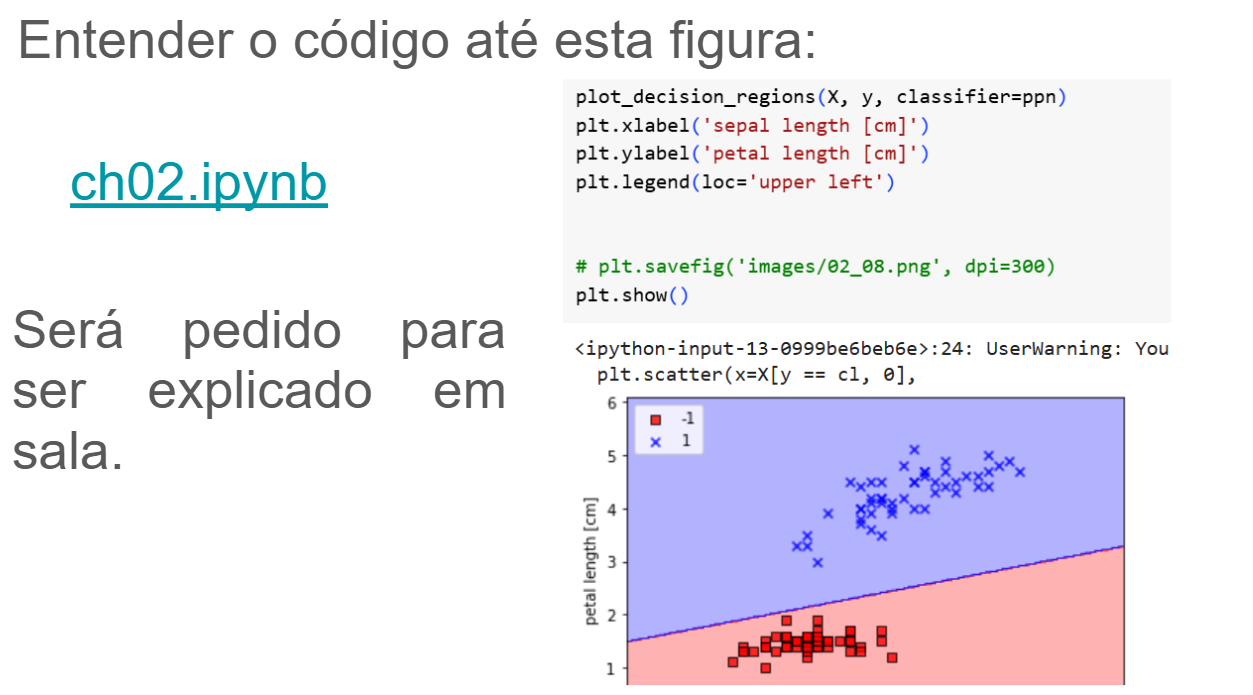

**OBS: A Sequência de códigos e imagens abaixo foram retiradas diretamente do código mencionado na questão.**

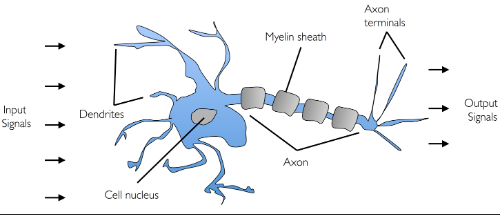

Essa primeira imagem faz uma analogiaentre o neurônio biológico e o neurônio artificial. No neurônio biológico, os sinais entram pelos dendritos, são integrados no corpo celular e, caso ultrapassem um certo limiar, um sinal é propagado pelo axônio até os terminais.

Essa ideia é abstraída no neurônio artificial: as entradas são ponderadas por pesos, somadas e, em seguida, passam por uma função de ativação que decide se haverá ou não saída.

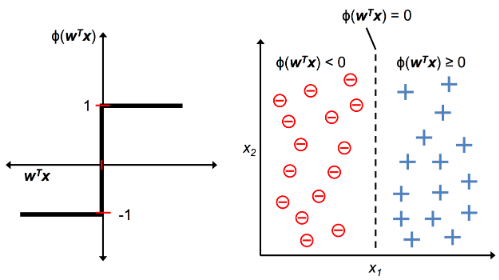

A segunda imagem mostra a função de ativação step, utilizada no perceptron clássico. Se a soma for maior que um determinado limiar ou zero, a saída é 1; caso contrário, é 0 (ou -1, dependendo da variação).

Nota-se que essa função atua como um limiar de decisão, separando o espaço de entrada em duas regiões distintas. No entanto, por ser não diferenciável, ela limita o uso de métodos baseados em gradiente.

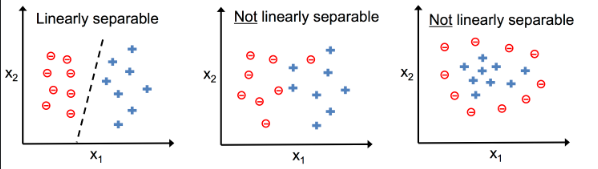

A terceira imagem ilustra diferentes cenários de separação entre classes. No primeiro caso, os dados são linearmente separáveis, sendo possível dividi-los por uma única reta. Nos outros exemplos, os dados não são linearmente separáveis, o que impossibilita a correta classificação usando apenas um modelo linear simples, sendo necessário utilizar modelos mais complexos, como redes com múltiplas camadas.

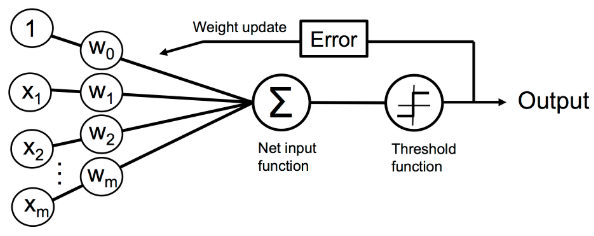

A quarta imagem apresenta o funcionamento interno do perceptron clássico, mostrando as etapas envolvidas no processo de classificação e atualização dos pesos. Inicialmente, cada entrada x é multiplicada por um peso w, e essas contribuições são somadas, juntamente com um bias, formando a entrada do neurônio.

Em seguida, esse resultado é passado por uma função de ativação do tipo step. Caso o valor da entrada ultrapasse o limiar, o neurônio ativa, caso contrário, permane inativo.

Além disso, evidencia-se o papel do erro no processo de aprendizado. Quando a saída produzida pelo perceptron é diferente do valor esperado, o erro é calculado e utilizado para ajustar os pesos. Esse ajuste ocorre de forma iterativa, deslocando a fronteira de decisão até que as amostras sejam corretamente classificadas ou até que o algoritmo atinja um critério de parada. Essa atualização dos pesos permite que o perceptron aprenda uma fronteira de decisão linear, sendo eficaz apenas quando os dados são linearmente separáveis.

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

np.float64(0.0)

Nesses códigos é definida uma classe para implementar um perceptron clássico.

O método *__init__* inicializa os hiperparâmetros do modelo:
- eta: representa a taxa de aprendizado, controlando o tamanho do ajuste dos pesos a cada erro.
- n_iter: define o número de épocas, ou seja, quantas vezes o algoritmo percorre todo o conjunto de treinamento.
- random_state: garante reprodutibilidade, fixando a semente do gerador de números aleatórios.

O método *fit* é responsável pelo treinamento do perceptron. Primeiramente são inicializados os pesos com valores aleatórios pequenos, incluindo o bias e um peso para cada entrada. Em seguida, entre em um loop de treinamento em que cada iteração representa uma época completa sobre o conjunto de dados, e dentro de cada época tem outro laço em que cada amostra é apresentada individualmente ao modelo (ou seja, aprendizado incremental). Após esses processos há a atualização dos pesos (se a previsão estiver correta, não há atualização dos pesos, e se estiver errada os pesos são ajustados proporcionalmente ao erro e à taxa de aprendizado), em que os pesos associados às entradas e ao bias são atualizados para deslocar a decisão na direção correta. Por fim, é feita a contagem de erros, que contabiliza quantas atualizações ocorreram em cada época. Se esse valor chega a zero, significa que nenhuma amostra foi classificada incorretamente naquela época.

O método *net_input* calcula a combinação linear das entradas, demonstrando a posição da amostra em relação à fronteira de decisão.

O método *predict* aplica a função de ativação step, que transforma a saída contínua da soma em uma classe discreto:
- valores positivos = classe +1
- valores negativos = classe -1
Essa etapa faz a decisão final do perceptron

\
A célula abaixo faz o cálculo do ângulo entre dois vetores baseado em um produto escalar normalizado. Como v2 é um múltiplo escalar de v1, os vetores são colineares, e o ângulo entre eles é zero. Esse conceito está diretamente ligado à interpretação geométrica do perceptron, onde os pesos definem a orientação da fronteira de decisão no espaço de características.

In [ ]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Esse trecho de código é responsável pelo carregamento do conjunto de dados Iris diretamente do repositório da UCI. Os dados são lidos em um DataFrame do pandas,

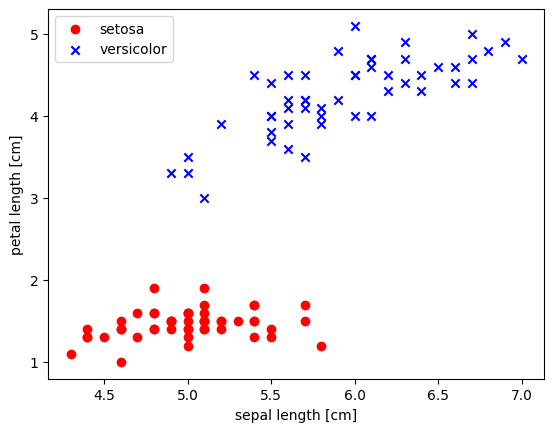

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Inicialmente, são selecionadas as 100 primeiras amostras do conjunto iris, correspondentes às classes Setosa e Versicolor. As classes são codificadas como -1 e 1 (pois está associado com a função de ativação step)

Depois, são extraídas apenas duas características: comprimento da sépala e comprimento da pétala. Em seguida, gera-se um gráfico de dispersão onde cada ponto representa uma amostra do conjunto de dados. As classes Setosa e Versicolor são representadas com cores e marcadores distintos.

Em relação ao gráfico, observa-se que as duas classes formam regiões bem separadas no espaço das características, indicando que os dados são linearmente separáveis quando consideradas essas duas variáveis.

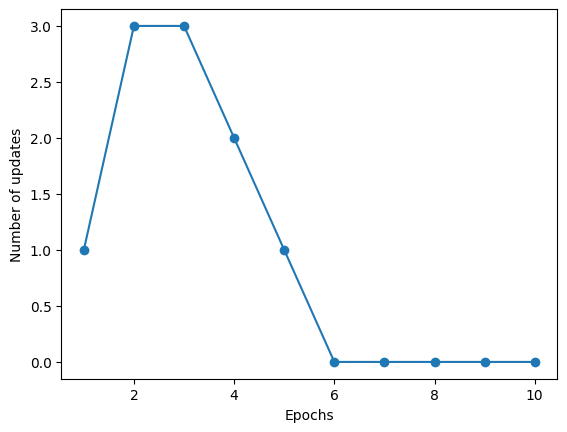

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Nesse código se cria um perceptron com taxa de aprendizado de 0.1 e 10 épocas de treinamento. Durante o fit, o algoritmo percorre o conjunto de dados várias vezes, ajustando os pesos sempre que uma amostra é classificada incorretamente, sempre deslocando os pesos na direção que reduz o erro da classificação.

O vetor  ppn.errors_ armazena, para cada época, quantas vezes os pesos precisaram ser atualizados, ou seja, o número de amostras mal classificadas. Em outras palavras, o gráfico não mostra erro contínuo, mas quantas correções foram necessárias e quão próximo o modelo chegou de uma solução estável.

Em relação ao gráfico, no inicio do treinamento, o número de atualizações tende a ser maior, pois os pesos ainda estão longe da fronteira de decisão adequada.À medida que as épocas avançam, observa-se a redução do número de erros, indicando que o perceptron está aprendendo uma fronteira de decisão melhor, e quando o valor chega a 0 ou se estabiliza, o modelo convergiu, o que só acontece quando os dados são linearmente separáveis (ou seja, o modelo encontrou uma reta que separa perfeitamente as duas classes).  

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipython-input-2498697379.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


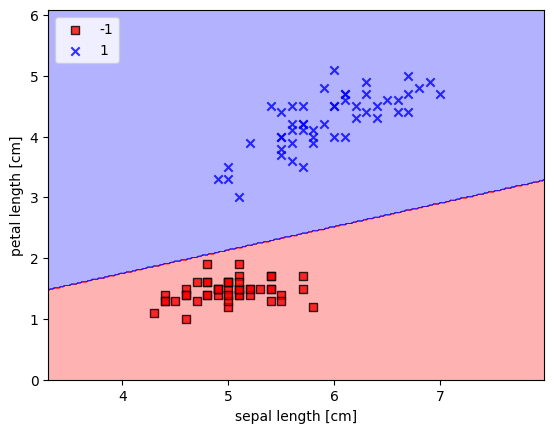

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

A função plot_decision_regions recebe:
- X: as featues(comprimento da sépala e da pétala)
- y: os rótulos das classes
- classifier: o modelo treinado (neste caso, o perceptron)
- resolution: a resolução da malha usada para desenhar a fronteira

Em seguida há a criação do mapa de cores e marcadores, depois a construção da malha do espaço de entrada, ou seja, cria uma grade de pontos cobrindo todo o espaço das features. Cada ponto dessa malha representa uma possível combinação de valores de entrada.

Depois, o classificador prevê a classe de cada ponto da malha, permitindo identificar como o modelo classifica cada região do espaço. Após, ele colore o plano de acordo com a classe prevista, gerando a superfície de decisão e, a transição entre as cores representa a fronteira de decisão linear aprendida pelo perceptron.

Por fim, os pontos reais do conjunto de dados são sobrepostos ao gráfico, permitindo comparar: a posição das amostras reais com a região em que o modelo classifica.

Em relação à imagem, observa-se que o modelo separa o plano em duas regiões distintas por meio de uma fronteira linear. A boa separação entre as classes Setosa e Versicolor confirma que os dados são linearmente separáveis nesse espaço, explicando a convergência do algoritmo e o número de erros chegando a zero ao longo das épocas.

## D1

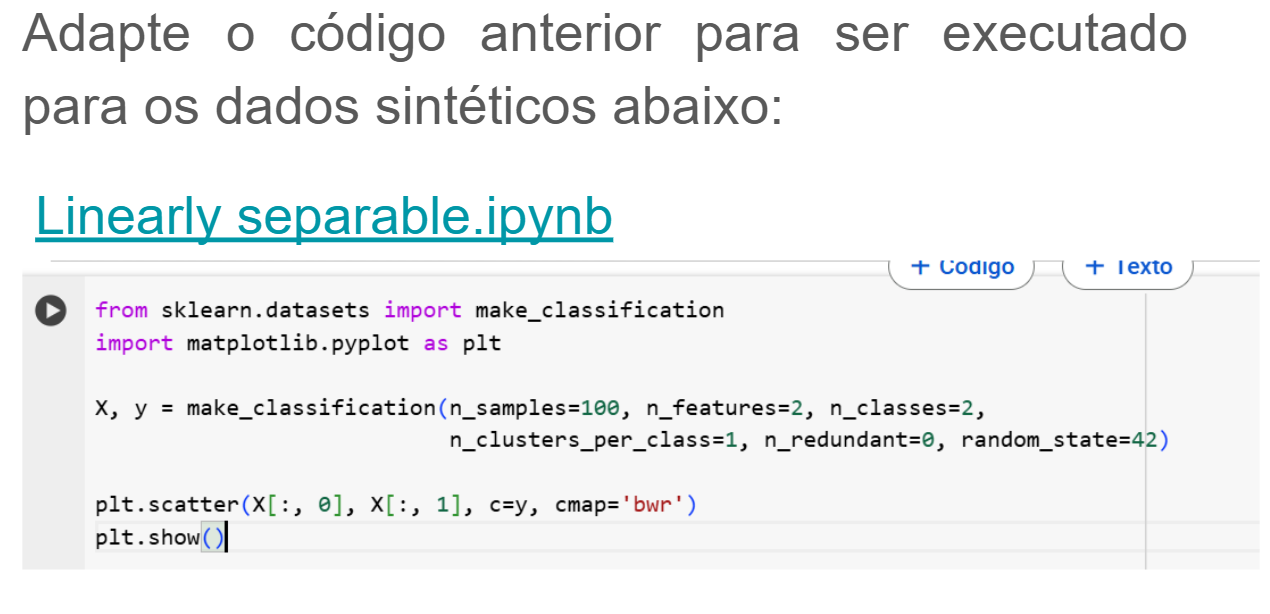

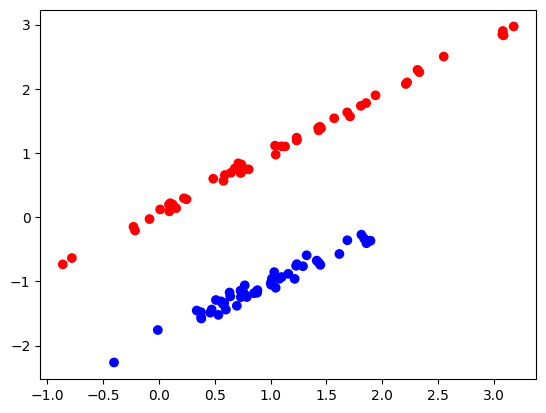

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.show()

In [ ]:
y = np.where(y == 0, -1, 1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

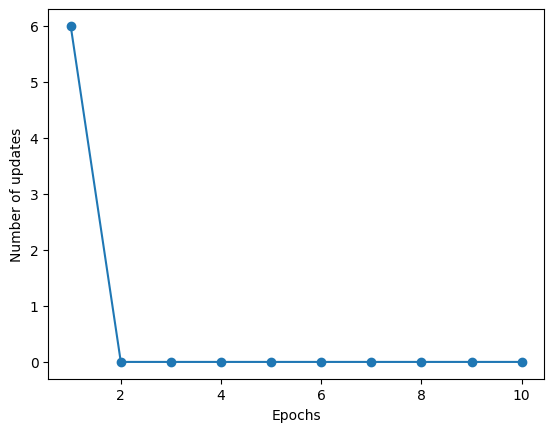

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

/tmp/ipython-input-2498697379.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


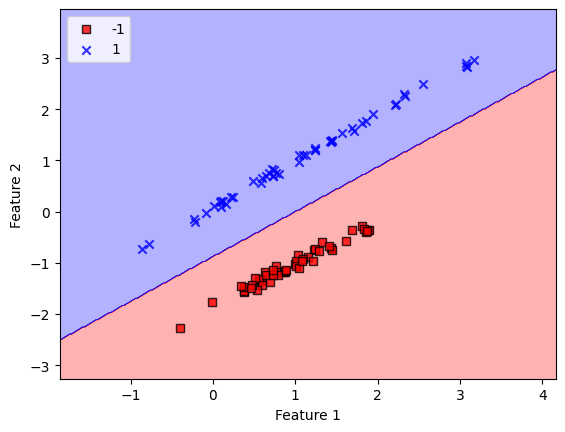

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()


### Interpretação D1

Nessa atividade, o perceptron foi aplicado a um outro conjunto de dados, um conjunto de dados sintético, mas ainda utilizando o mesmo perceptron da atividade C1, ao invés de usar a base de dados iris.

Ao analisar o gráfico do número de atualizações por época, observa-se que o perceptron converge extremamente rápido, atingindo zero atualizações já a partir da segunda época. Isso indica que o modelo encontrou rapidamente uma fronteira de decisão capaz de separar completamente as duas classes dos dados sintéticos. Em comparação com a atividade C1, nota-se que a convergência ocorre de forma ainda mais abrupta. No caso do conjunto Iris (Setosa x Versicolor), embora os dados sejam linearmente separáveis, existe uma maior sobreposição e variabilidade natural entre as amostras, o que faz com que o perceptron necessite de mais épocas para eliminar completamente os erros de classificação.

A visualização da fronteira de decisão confirma esse comportamento, evidenciando uma separação linear entre as regiões atribuídas a cada classe. Esse novo teste reforça a limitação do perceptron clássico, que só é capaz de aprender situações lineares, mas também demonstra eficiência quando essa condição é satisfeita.

## E1

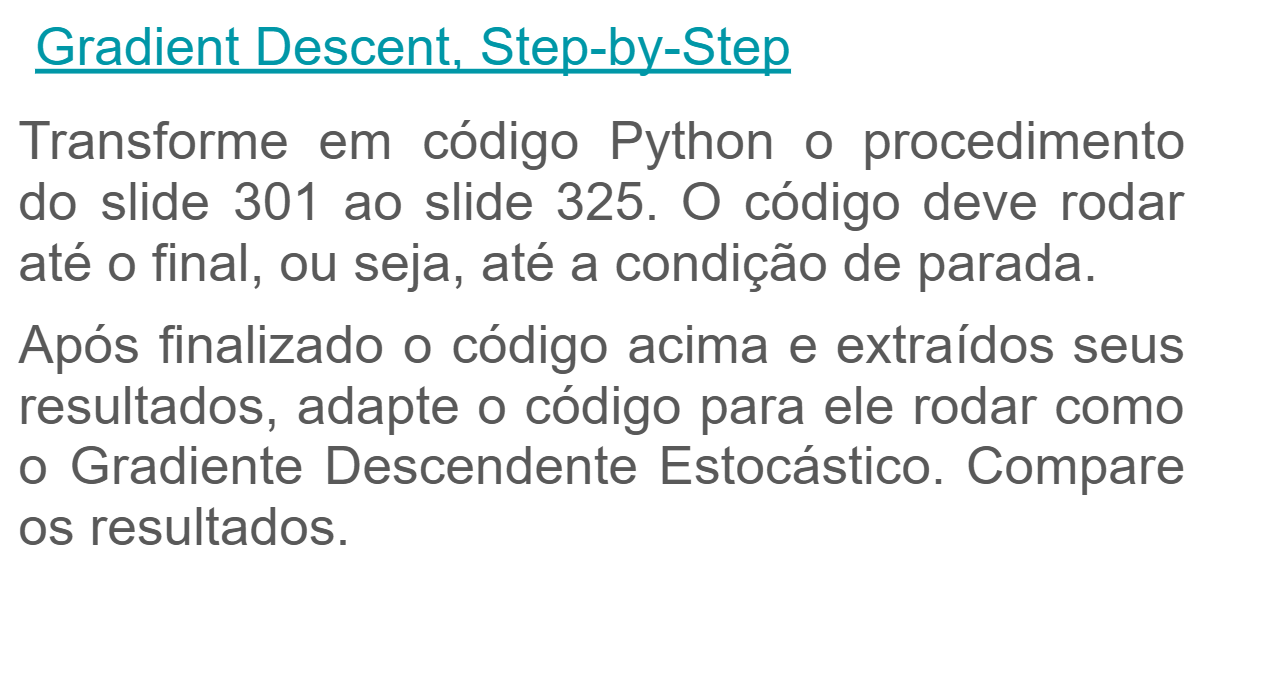

In [ ]:
x = np.array([1,2,3], dtype = float)
y = np.array([1.5, 1.9, 3.2], dtype = float)

In [ ]:
slope = 1
intercept = 0

taxa_aprendizado = 0.01
parada = 1e-6
max_iter = 2000

In [ ]:
n = len(x)
iteracao = 0

print("Iter | m        | b        | SSR")

while True:
  y_pred = slope * x + intercept

  residuos = y - y_pred

  ssr = np.sum(residuos ** 2)

  derivada_slope = -2 * np.sum(x * residuos)
  derivada_intercept = -2 * np.sum(residuos)


  print(f"{iteracao:4d} | {slope:8.5f} | {intercept:8.5f} | {ssr:8.5f}")

  # Atualizar parâmetros
  slope_new = slope - taxa_aprendizado * derivada_slope
  intercept_new = intercept - taxa_aprendizado * derivada_intercept

  if abs(slope_new - slope) < parada and abs(intercept_new - intercept) < parada:
    break

  slope, intercept = slope_new, intercept_new
  iteracao += 1

  if iteracao >= max_iter:
    print('Parada por limite de iterações')
    break

print("\nResultado final:")
print(f"Slope         = {slope}")
print(f"Intercept     = {intercept}")
print(f"SSR final     = {ssr}")
print(f"Iterações     = {iteracao}")

Iter | m        | b        | SSR
   0 |  1.00000 |  0.00000 |  0.30000
   1 |  1.01800 |  0.01200 |  0.26076
   2 |  1.02952 |  0.02112 |  0.24254
   3 |  1.03672 |  0.02831 |  0.23369
   4 |  1.04104 |  0.03421 |  0.22902
   5 |  1.04344 |  0.03923 |  0.22622
   6 |  1.04457 |  0.04366 |  0.22426
   7 |  1.04485 |  0.04769 |  0.22269
   8 |  1.04457 |  0.05145 |  0.22130
   9 |  1.04392 |  0.05501 |  0.22001
  10 |  1.04302 |  0.05844 |  0.21876
  11 |  1.04196 |  0.06177 |  0.21754
  12 |  1.04080 |  0.06503 |  0.21635
  13 |  1.03957 |  0.06823 |  0.21518
  14 |  1.03830 |  0.07139 |  0.21403
  15 |  1.03701 |  0.07451 |  0.21289
  16 |  1.03571 |  0.07760 |  0.21177
  17 |  1.03440 |  0.08066 |  0.21067
  18 |  1.03309 |  0.08369 |  0.20958
  19 |  1.03178 |  0.08670 |  0.20851
  20 |  1.03048 |  0.08968 |  0.20745
  21 |  1.02918 |  0.09265 |  0.20641
  22 |  1.02789 |  0.09559 |  0.20539
  23 |  1.02661 |  0.09850 |  0.20437
  24 |  1.02534 |  0.10140 |  0.20338
  25 |  1.02408 |

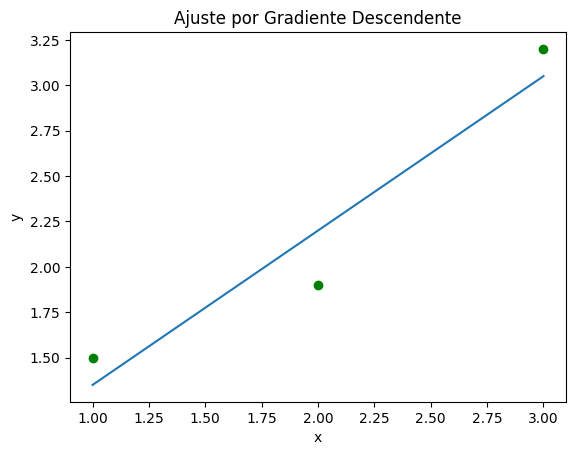

In [ ]:
x_line = np.linspace(min(x), max(x), 100)
y_line = slope * x_line + intercept

# Plot
plt.figure()
plt.scatter(x, y, color = 'green')
plt.plot(x_line, y_line)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por Gradiente Descendente")
plt.show()

### Interpretação E1 - Gradiente Descendente

Ao analisar os resultados do Gradiente Descendente aplicado à regressão linear, observa-se que a função objetivo, representada pela soma dos quadrados dos resíduos (SSR), diminui progressivamente ao longo das iterações. O valor inicial relativamente elevado do erro indica que os parâmetros iniciais (inclinação m = 1 e intercepto b = 0) não ajustavam adequadamente os dados observados.

Com as atualizações sucessivas dos parâmetros, realizadas a partir do gradiente da função de custo, nota-se que tanto a inclinação quanto o intercepto convergem gradualmente para valores estáveis. Esse comportamento evidencia que o algoritmo está seguindo corretamente a direção de maior descida da função erro, reduzindo a diferença entre os valores observados e os valores previstos pelo modelo.

o critério de parada baseado na variação mínima dos parâmetros (1e-6) foi atingido após 1125 iterações, indicando convergência do algoritmo. Os valores finais obtidos foram m = 0.85 e b = 0.49, correspondentes à reta que melhor ajusta os dados no sentido de mínimos quadrados, o que é corroborado pelo valor final reduzido do ssr (0.135)

O gráfico mostra que a reta ajustada aproxima progressivamente dos pontos observados, minimizando os resíduos.

In [ ]:
slope = 1.0
intercept = 0.0

taxa_aprendizado = 0.01
parada = 1e-6
max_iter = 2000

iteracao = 0

print("Iter | m        | b        | SSR")

while True:

    slope_antigo = slope
    intercept_antigo = intercept

    indices_embaralhados = np.random.permutation(len(x))

    for i in indices_embaralhados:
        y_pred = slope * x[i] + intercept
        residuo = y[i] - y_pred

        derivada_slope = -2 * x[i] * residuo
        derivada_intercept = -2 * residuo

        slope -= taxa_aprendizado * derivada_slope
        intercept -= taxa_aprendizado * derivada_intercept

    y_pred_total = slope * x + intercept
    residuos = y - y_pred_total
    ssr = np.sum(residuos ** 2)

    print(f"{iteracao:4d} | {slope:8.5f} | {intercept:8.5f} | {ssr:8.5f}")

    # Critério de parada
    if abs(slope - slope_antigo) < parada and abs(intercept - intercept_antigo) < parada:
        break

    iteracao += 1

    if iteracao >= max_iter:
        print("Parada por limite de iterações")
        break

print("\nResultado final (SGD):")
print(f"Slope         = {slope}")
print(f"Intercept     = {intercept}")
print(f"SSR final     = {ssr}")
print(f"Iterações     = {iteracao}")


Iter | m        | b        | SSR
   0 |  1.01540 |  0.01054 |  0.26524
   1 |  1.02584 |  0.01921 |  0.24685
   2 |  1.03269 |  0.02624 |  0.23700
   3 |  1.04006 |  0.03334 |  0.22971
   4 |  1.04149 |  0.03782 |  0.22715
   5 |  1.04337 |  0.04276 |  0.22469
   6 |  1.04418 |  0.04715 |  0.22289
   7 |  1.04633 |  0.05188 |  0.22132
   8 |  1.04741 |  0.05611 |  0.22016
   9 |  1.04271 |  0.05803 |  0.21887
  10 |  1.04199 |  0.06166 |  0.21759
  11 |  1.04104 |  0.06516 |  0.21634
  12 |  1.04203 |  0.06924 |  0.21529
  13 |  1.04044 |  0.07241 |  0.21408
  14 |  1.03578 |  0.07420 |  0.21285
  15 |  1.03431 |  0.07712 |  0.21177
  16 |  1.03360 |  0.08058 |  0.21060
  17 |  1.03147 |  0.08317 |  0.20957
  18 |  1.03081 |  0.08661 |  0.20843
  19 |  1.03209 |  0.09062 |  0.20744
  20 |  1.03260 |  0.09427 |  0.20661
  21 |  1.03041 |  0.09698 |  0.20544
  22 |  1.03066 |  0.10047 |  0.20466
  23 |  1.02549 |  0.10179 |  0.20329
  24 |  1.02470 |  0.10501 |  0.20227
  25 |  1.02284 |

### Interpretação E1 - Gradiente Descendente Estocástico

Ao analisar os resultados do Gradiente Descendente Estocástico, observa-se que o valor da função de custo (SSR) também apresenta tendência de redução ao longo das iterações, porém com maiores oscilações quando comparado ao Gradiente Descendente tradicional. Esse comportamento ocorre porque, no SGD, as atualizações dos parâmetros são realizadas a partir de uma única amostra por vez, o que colocs ruído na estimativa do gradiente.

Apesar dessa instabilidade, o SGD converge para valores muito próximos aos obtidos com o Gradiente Descendente convencional, com inclinação m = 0.85, intercepto b = 0.49 e SSR final em torno de 0.135. A convergência ocorre de forma aproximada, oscilando ao redor do mínimo global, o que é uma característica desse método.

A parada do algoritmo pelo limite máximo de iterações reforça essa característica: embora o modelo já esteja próximo da solução ótima, as pequenas flutuações nos parâmetros dificultam o atendimento de um critério de parada baseado apenas na variação dos coeficientes.

### Comparação de Resultados

Ao comparar os resultados obtidos com o Gradiente Descendente tradicional e com o Gradiente Descendente Estocástico, observa-se que ambos os métodos convergem para soluções muito semelhantes, com valores finais próximos para a inclinação m = 0.85, intercepto b = 0.49 e ssr de 0.135, indicando que, apesar das diferenças no processo de atualização dos parâmetros, ambos são capazes de minimizar a função de custo de forma eficaz neste problema.

A principal diferença entre os métodos está no comportamento da convergência. No Gradiente Descendente, o erro diminui de forma suave, pois o gradiente é calculado considerando todo o conjunto de dados, resultando em atualizações mais estáveis e previsíveis. Esse comportamento facilitou o atendimento do critério de parada baseado na variação dos parâmetros.

Já no Gradiente Descendente Estocástico, a convergência ocorre de maneira mais ruidosa, com oscilações nos valores dos parâmetros e do erro ao longo das iterações. Isso acontece porque cada atualização é baseada em apenas uma amostra, introduzindo variabilidade na direção do gradiente. Como consequência, o algoritmo tende a oscilar em torno do mínimo global, o que explica a parada pelo número máximo de iterações, mesmo estando próximo da solução ótima.

Em outras palavras, o Gradiente Descendente é mais estável e indicado para conjuntos de dados pequenos, enquanto o SGD se destaca pela maior eficiência computacional e escalabilidade, sendo mais adequado para bases de dados grandes, onde o custo de calcular o gradiente completo se torna elevado.

## F1

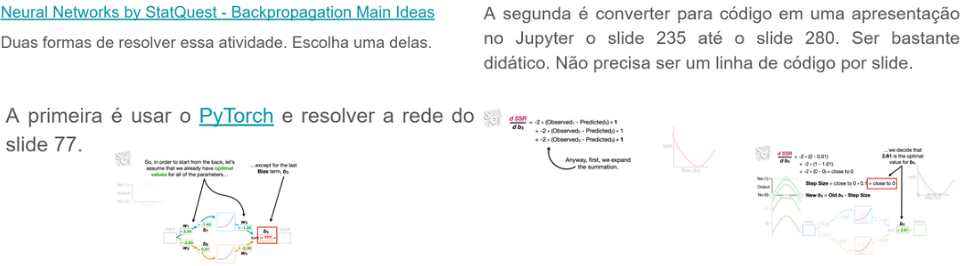

In [ ]:
x = torch.tensor([0.0, 0.5, 1.0])
y_true = torch.tensor([0.0, 1.0, 0.0])

In [ ]:
w1 = torch.tensor(3.34)
b1 = torch.tensor(-1.43)

w2 = torch.tensor(-3.53)
b2 = torch.tensor(0.57)

w3 = torch.tensor(-1.22)
w4 = torch.tensor(-2.30)

In [ ]:
b3 = torch.tensor(0.0, requires_grad = True)

In [ ]:
taxa_aprendizado = 0.01
max_iter = 2000
parada = 1e-6

In [ ]:
print("Iter | b3        | Loss")

for i in range(max_iter):
  pre_ativacao1 = w1 * x + b1
  a1 = torch.nn.functional.softplus(pre_ativacao1)

  pre_ativacao2 = w2 * x + b2
  a2 = torch.nn.functional.softplus(pre_ativacao2)

  y_pred = w3 * a1 + w4 * a2 + b3

  loss = torch.sum((y_pred - y_true) ** 2)

  loss.backward()

  print(f"{i:4d} | {b3.item():8.5f} | {loss.item():8.5f}")

  with torch.no_grad():
    b3 -= taxa_aprendizado * b3.grad

  if abs(b3.grad.item()) < parada:
    break

  b3.grad.zero_()

print("\nResultado final:")
print(f"b3 = {b3.item():.2f}")

Iter | b3        | Loss
   0 |  2.60918 |  0.00006
   1 |  2.60918 |  0.00006
   2 |  2.60918 |  0.00006
   3 |  2.60918 |  0.00006
   4 |  2.60918 |  0.00006
   5 |  2.60918 |  0.00006
   6 |  2.60918 |  0.00006
   7 |  2.60918 |  0.00006
   8 |  2.60918 |  0.00006
   9 |  2.60918 |  0.00006
  10 |  2.60918 |  0.00006
  11 |  2.60918 |  0.00006
  12 |  2.60918 |  0.00006
  13 |  2.60918 |  0.00006
  14 |  2.60918 |  0.00006
  15 |  2.60918 |  0.00006
  16 |  2.60918 |  0.00006
  17 |  2.60918 |  0.00006
  18 |  2.60918 |  0.00006
  19 |  2.60918 |  0.00006
  20 |  2.60918 |  0.00006
  21 |  2.60918 |  0.00006
  22 |  2.60918 |  0.00006
  23 |  2.60918 |  0.00006
  24 |  2.60918 |  0.00006
  25 |  2.60918 |  0.00006
  26 |  2.60918 |  0.00006
  27 |  2.60918 |  0.00006
  28 |  2.60918 |  0.00006
  29 |  2.60918 |  0.00006
  30 |  2.60918 |  0.00006
  31 |  2.60918 |  0.00006
  32 |  2.60918 |  0.00006
  33 |  2.60918 |  0.00006
  34 |  2.60918 |  0.00006
  35 |  2.60918 |  0.00006
  36

### Interpretação da F1

Nesta atividade, foi utilizada a biblioteca PyTorch para reproduzir o funcionamento da rede neural apresentada no slide 77, considerando que todos os pesos e vieses já se encontram em valores ótimos, com exceção do viés da camada de saída(b3), que foi ajustado por meio de gradiente descendente.

Durante o processo de treinamento, apenas o parâmetro b3 foi definido como treinável enquanto os demais parâmetros permaneceram fixos. A propagação direta foi realizada utilizando a função de ativação Softplus nos dois neurônios ocultos, seguida de uma combinação linear na saída. A função de perda adotada foi o SSR, calculando a diferença entre as saídas previstas e os valores reais.

Observa-se que, ao longo das iterações, o valor da função de perda diminui progressivamente, indicando que o ajuste do viés b3 está ocorrendo na direção correta para minimizar o erro. O critério de parada baseado no gradiente garante que o algoritmo interrompa o treinamento quando a atualização do parâmetro se torna desprezível, caracterizando a convergência.

O valor final encontrado para o viés da saída foi b3 = 2.61, exatamente o mesmo apresentado no slide, o que valida a implementação do algoritmo e confirma o correto funcionamento do mecanismo de backpropagation. Interessante que esse teste mostra como o gradiente pode ser utilizado para ajustar seletivamente parâmetros específicos de uma rede, mesmo quando o restante da arquitetura permanece fixo.

## G1

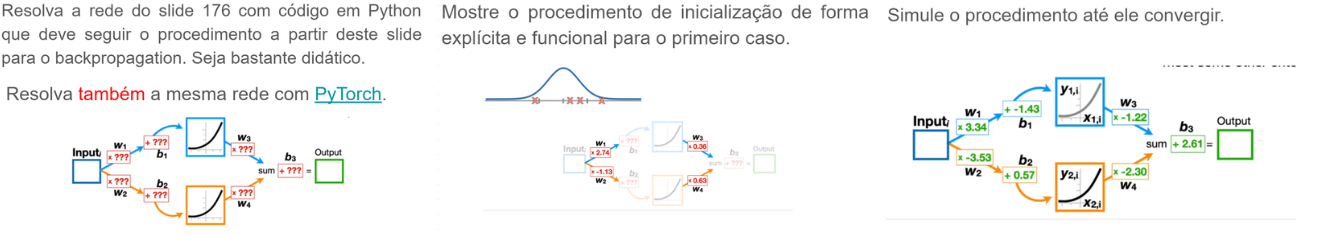

In [ ]:
def softplus(z):
  return math.log(1 + math.exp(z))
#-----------------------------------
def sigmoid(z):
  return 1 / (1 + math.exp(-z))

In [ ]:
x = [0.0, 0.5, 1.0]
y = [0.0, 1.0, 0.0]

In [ ]:
w1 = 2.74
w2 = -1.13
w3 = 0.36
w4 = 0.63

b1 = 0.0
b2 = 0.0
b3 = 0.0

In [ ]:
lr = 0.01
parada = 1e-4
max_iter = 15000

In [ ]:
print("Iter | SSR     | w1     b1     w2     b2     w3     w4     b3")
historico_ssr = []

for iter in range(max_iter):

  ssr = 0

  derivada_w1 = 0
  derivada_w2 = 0
  derivada_w3 = 0
  derivada_w4 = 0

  derivada_b1 = 0
  derivada_b2 = 0
  derivada_b3 = 0

  for xi, yi in zip(x,y):

    # Forward
    pre_ativacao1 = w1 * xi + b1
    y1 = softplus(pre_ativacao1)

    pre_ativacao2 = w2 * xi + b2
    y2 = softplus(pre_ativacao2)

    y_pred = w3 * y1 + w4 * y2 + b3

    erro = yi - y_pred

    ssr += erro ** 2
    historico_ssr.append(ssr)

    # Backpropagation
    derivada_perda_relacao_y_pred = -2 * erro

    derivada_w3 += derivada_perda_relacao_y_pred * y1
    derivada_w4 += derivada_perda_relacao_y_pred * y2
    derivada_b3 += derivada_perda_relacao_y_pred

    derivada_y1_derivada_pre_ativacao1 = sigmoid(pre_ativacao1)
    derivada_y2_derivada_pre_ativacao2 = sigmoid(pre_ativacao2)

    derivada_w1 += derivada_perda_relacao_y_pred * w3 * derivada_y1_derivada_pre_ativacao1 * xi
    derivada_b1 += derivada_perda_relacao_y_pred * w3 * derivada_y1_derivada_pre_ativacao1

    derivada_w2 += derivada_perda_relacao_y_pred * w4 * derivada_y2_derivada_pre_ativacao2 * xi
    derivada_b2 += derivada_perda_relacao_y_pred * w4 * derivada_y2_derivada_pre_ativacao2

  print(f"{iter:4d} | {ssr:7.4f} | {w1:5.2f} {b1:5.2f} {w2:5.2f} {b2:5.2f} {w3:5.2f} {w4:5.2f} {b3:5.2f}")

  # Atualização
  w1 -= lr * derivada_w1
  w2 -= lr * derivada_w2
  w3 -= lr * derivada_w3
  w4 -= lr * derivada_w4

  b1 -= lr * derivada_b1
  b2 -= lr * derivada_b2
  b3 -= lr * derivada_b3

  if (abs(derivada_w1) < parada and
    abs(derivada_w2) < parada and
    abs(derivada_w3) < parada and
    abs(derivada_w4) < parada and
    abs(derivada_b1) < parada and
    abs(derivada_b2) < parada and
    abs(derivada_b3) < parada):
    print("Convergência atingida")
    break

print("\nResultado final:")
print(f"w1={w1:.2f}, b1={b1:.2f}")
print(f"w2={w2:.2f}, b2={b2:.2f}")
print(f"w3={w3:.2f}, w4={w4:.2f}, b3={b3:.2f}")
print(f"SSR={ssr:.2f}, Iterações={iter}")

A saída de streaming foi truncada nas últimas 5000 linhas.
3069 |  0.6180 |  2.73 -0.15 -1.06 -0.02 -0.13 -0.53  0.79
3070 |  0.6179 |  2.73 -0.15 -1.06 -0.02 -0.13 -0.53  0.79
3071 |  0.6178 |  2.73 -0.15 -1.06 -0.02 -0.13 -0.53  0.79
3072 |  0.6178 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.53  0.80
3073 |  0.6177 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.53  0.80
3074 |  0.6176 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3075 |  0.6176 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3076 |  0.6175 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3077 |  0.6174 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3078 |  0.6173 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3079 |  0.6173 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3080 |  0.6172 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3081 |  0.6171 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3082 |  0.6171 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3083 |  0.6170 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3084 |  0.6169 |  2.73 -0.15 -1.07 -0.02 -0.14 -0.54  0.

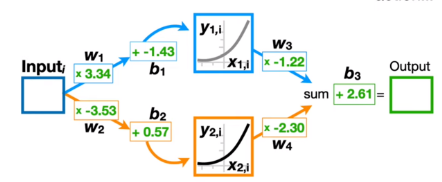

PyTorch

In [ ]:
# A mesma rede, mas agora usando PyTorch

x = torch.tensor([0.0, 0.5, 1.0])
y = torch.tensor([0.0, 1.0, 0.0])

w1 = torch.tensor(2.74, requires_grad=True)
w2 = torch.tensor(-1.13, requires_grad=True)
w3 = torch.tensor(0.36, requires_grad=True)
w4 = torch.tensor(0.63, requires_grad=True)

b1 = torch.tensor(0.0, requires_grad=True)
b2 = torch.tensor(0.0, requires_grad=True)
b3 = torch.tensor(0.0, requires_grad=True)

lr = 0.01
parada = 1e-4
iteracao = 0

In [ ]:
print("Iter | SSR     | w1     b1     w2     b2     w3     w4     b3")

while True:

  # Forward
  pre_ativacao1 = w1 * x + b1
  y1 = torch.nn.functional.softplus(pre_ativacao1)

  pre_ativacao2 = w2 * x + b2
  y2 = torch.nn.functional.softplus(pre_ativacao2)

  y_pred = w3 * y1 + w4 * y2 + b3

  perda = torch.sum((y - y_pred) ** 2)

  # Backward
  perda.backward()

  print(f"{iteracao:4d} | {perda.item():7.4f} | {w1.item():5.2f} {b1.item():5.2f} {w2.item():5.2f} {b2.item():5.2f} {w3.item():5.2f} {w4.item():5.2f} {b3.item():5.2f}")

  # Atualização
  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad
    w3 -= lr * w3.grad
    w4 -= lr * w4.grad

    b1 -= lr * b1.grad
    b2 -= lr * b2.grad
    b3 -= lr * b3.grad

  if (abs(w1.grad.item()) < parada and
        abs(w2.grad.item()) < parada and
        abs(w3.grad.item()) < parada and
        abs(w4.grad.item()) < parada and
        abs(b1.grad.item()) < parada and
        abs(b2.grad.item()) < parada and
        abs(b3.grad.item()) < parada):
        print("Convergência atingida")
        break

  w1.grad.zero_()
  w2.grad.zero_()
  w3.grad.zero_()
  w4.grad.zero_()

  b1.grad.zero_()
  b2.grad.zero_()
  b3.grad.zero_()

  iteracao += 1

print("\nResultado final:")
print(f"w1={w1.item():.2f}, b1={b1.item():.2f}")
print(f"w2={w2.item():.4f}, b2={b2.item():.2f}")
print(f"w3={w3.item():.2f}, w4={w4.item():.2f}, b3={b3.item():.2f}")
print(f"SSR={perda.item():.2f}, Iterações={iteracao}")

A saída de streaming foi truncada nas últimas 5000 linhas.
3073 |  0.6177 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.53  0.80
3074 |  0.6176 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3075 |  0.6176 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3076 |  0.6175 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3077 |  0.6174 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3078 |  0.6173 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3079 |  0.6173 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3080 |  0.6172 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3081 |  0.6171 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3082 |  0.6171 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3083 |  0.6170 |  2.73 -0.15 -1.06 -0.02 -0.14 -0.54  0.80
3084 |  0.6169 |  2.73 -0.15 -1.07 -0.02 -0.14 -0.54  0.80
3085 |  0.6168 |  2.73 -0.16 -1.07 -0.02 -0.14 -0.54  0.80
3086 |  0.6168 |  2.73 -0.16 -1.07 -0.02 -0.14 -0.54  0.80
3087 |  0.6167 |  2.73 -0.16 -1.07 -0.02 -0.14 -0.54  0.80
3088 |  0.6166 |  2.73 -0.16 -1.07 -0.02 -0.14 -0.54  0.

### Interpretação G1

O objetivo do treinamento é ajustar os pesos e vieses de forma que a saída da rede se aproxime dos valores desejados para cada amostra do conjunto de dados. Para isso, foi utilizado o algoritmo de backpropagation combinado com o gradiente descendente.

O processo de treinamento começa com a inicialização explícita dos parâmetros da rede. Os pesos e vieses são definidos com valores iniciais fixos, o que permite acompanhar como o algoritmo ajusta cada parâmetro ao longo das iterações.

Em seguida, ocorre a propagação forward. Para cada amostra de entrada, o valor é combinado linearmente com os pesos e vieses dos dois neurônios ocultos. O resultado dessa combinação é então passado pela função Softplus, que introduz não linearidade na rede. Essa não linearidade é essencial para que a rede consiga modelar relações mais complexas entre entrada e saída, algo que não seria possível com uma rede puramente linear. As saídas das unidades ocultas são então combinadas linearmente na camada de saída, produzindo a predição final da rede.

Após obter a saída prevista, é calculado o erro da rede por meio da soma dos erros quadráticos (SSR), que mede o quão distante a predição está do valor real. Essa função de perda serve como um critério quantitativo de desempenho: quanto menor o valor da SSR, melhor o ajuste da rede aos dados.

A etapa seguinte é a retropropagação (backpropagation). Nessa fase, o erro calculado na saída é propagado de volta pela rede, permitindo calcular como cada parâmetro contribuiu para esse erro. Conceitualmente, isso significa responder à pergunta: se eu alterar ligeiramente este peso ou viés, o erro aumenta ou diminui? A resposta a essa pergunta é dada pelo gradiente da função de perda em relação a cada parâmetro. .

Com os gradientes calculados, os parâmetros da rede são atualizados na direção oposta ao gradiente, seguindo o princípio do gradiente descendente. Isso significa que os pesos e vieses são ajustados de modo a reduzir o erro total da rede. Os gradientes são acumulados considerando todas as amostras antes da atualização, garantindo uma direção de descida mais estável.

O forward, cálculo do erro, backpropagation e atualização dos parâmetros é repetido iterativamente. O processo continua até que os gradientes se tornem suficientemente pequenos, indicando que a rede atingiu um ponto de convergência, ou seja, um mínimo da função de perda. Na prática, isso corresponde a um estado em que ajustes adicionais nos parâmetros não produzem melhorias significativas no erro.

O resultado final do treinamento mostra que a rede converge exatamente para os valores de pesos e vieses apresentados no slide, com erro praticamente nulo. Isso indica que a arquitetura da rede é capaz de representar os dados fornecidos. A repetição do mesmo experimento utilizando o PyTorch leva aos mesmos valores finais.

Pode-se dizer que o treinamento demonstra como uma rede neural aprende a partir dos dados: iniciando com parâmetros arbitrários, avaliando o erro de suas previsões e ajustando gradualmente seus pesos e vieses por meio do gradiente descendente até atingir uma solução ótima.